# Conjunto de datos

## Obtener el conjunto de datos

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.ticker as ticker
import numpy as np

In [177]:
from ucimlrepo import fetch_ucirepo

# Descargar dataset con ID 144
statlog_german_credit_data = fetch_ucirepo(id=144)

# Guardar todo el dataset en un DataFrame
df = statlog_german_credit_data.data.original

#Cambiamos los nombres de las columnas para mejor representacion de su significado
df = df.rename(columns={
    'Attribute1': 'estado_cuenta_corriente',     # Categorical
    'Attribute2': 'duracion_meses',              # Integer
    'Attribute3': 'historial_crediticio',        # Categorical
    'Attribute4': 'proposito',                   # Categorical
    'Attribute5': 'monto_credito',               # Integer
    'Attribute6': 'cuenta_ahorro_bonos',         # Categorical
    'Attribute7': 'años_empleo',                 # Categorical
    'Attribute8': 'porc_ingreso_disponible',     # Integer
    'Attribute9': 'estado_civil_sexo',           # Categorical
    'Attribute10': 'otros_deudores_garantes',    # Categorical
    'Attribute11': 'residencia_actual_anios',    # Integer
    'Attribute12': 'propiedad',                  # Categorical
    'Attribute13': 'edad',                       # Integer
    'Attribute14': 'otros_creditos',             # Categorical
    'Attribute15': 'vivienda',                   # Categorical
    'Attribute16': 'num_creditos_banco',         # Integer
    'Attribute17': 'ocupacion',                  # Categorical
    'Attribute18': 'num_personas_a_cargo',       # Integer
    'Attribute19': 'telefono',                   # Binary
    'Attribute20': 'trabajador_extranjero',      # Binary
    'class': 'riesgo_crediticio'                 # Binary (Target)
})

## Informacion del Datasheet

### Motivación

**¿Con qué propósito se creó el conjunto de datos? ¿Era para una tarea específica? ¿Había una brecha específica que necesitaba ser cubierta?**

El dataset fue creado para clasificar personas como buenos o malos riesgos crediticios en base a un conjunto atributos.

Su finalidad principal es apoyar tareas de clasificación en el ámbito financiero, específicamente para evaluar la solvencia crediticia de clientes.

No se indica una brecha específica, pero sí se diseñó para facilitar el desarrollo y evaluación de modelos de predicción de riesgo crediticio.

**¿Quién creó el conjunto de datos (equipo, grupo de investigación) y en nombre de qué entidad?**

El conjunto de datos fue donado por el Profesor Dr. Hans Hofmann, del Institut für Statistik und Ökonometrie, Universität Hamburg, Alemania, como parte del proyecto europeo Statlog.

### Composición

**¿Qué representan las instancias que componen el conjunto de datos? ¿Hay varios tipos de instancias?**

Cada instancia representa a una persona que solicita un crédito bancario. El dataset contiene 1000 ejemplos con 20 características que incluyen variables tanto categóricas como numéricas, describiendo aspectos financieros y personales del solicitante (por ejemplo, estado de cuenta, duración del crédito, historial crediticio, propósito, monto, edad, género, empleo, entre otros).
No hay varios tipos de instancias, todas representan personas solicitantes de crédito.

### Proceso de recopilación

**¿Cómo se adquirieron los datos asociados con cada instancia? ¿Fueron observados directamente, informados por sujetos o derivados? ¿Fueron validados o verificados?**

Los datos provienen de registros bancarios reales, por lo que fueron observados directamente a partir de la información financiera y personal de los solicitantes. No se especifica que hayan sido informados por los sujetos ni derivados indirectamente.
Se menciona que el dataset es un muestreo estratificado de créditos reales, con 1000 créditos (300 malos y 700 buenos).
La validación o verificación específica no está detallada, aunque el dataset ha sido ampliamente utilizado y revisado en la literatura.

### Preprocesamiento/limpieza/etiquetado

**¿Se realizó algún preprocesamiento/limpieza/etiquetado de los datos?**

El dataset original tiene variables tanto numéricas como categóricas, y viene acompañado de un archivo (german.doc) que explica el significado de cada variable y sus categorías.

En general, se hizo lo siguiente:

* Se eliminaron algunas filas con datos faltantes para mantener la calidad.
* Se agruparon algunas categorías poco frecuentes para simplificar el análisis.
* Se renombraron algunas variables para que sean más claras.
* Se definieron algunas variables como ordinales (es decir, con un orden natural).
* Se creó una versión numérica del dataset para facilitar el trabajo con modelos computacionales.

No se hizo una limpieza profunda ni se eliminaron muchas filas, sino que principalmente se hizo codificación y organización para que los datos sean más fáciles de usar.

### Usos

**¿Se ha utilizado el conjunto de datos para alguna tarea?**

Sí, es uno de los datasets más usados para tareas de clasificación en machine learning, especialmente para modelos de riesgo crediticio y fairness en decisiones financieras.

**¿Existe un repositorio que enlace a alguno o todos los documentos o sistemas que utilizan el conjunto de datos?**

Existen múltiples repositorios en GitHub, así como competiciones y kernels en Kaggle que usan este dataset para análisis, modelado y evaluación de fairness.

### Referencias


[Comparative Testing and Evaluation of Statistical and Logical Learning Algorithms for Large-Scale Applications in Classification, Prediction and Control](https://cordis.europa.eu/project/rcn/8791/factsheet/en)

[Statlog (German Credit Data)](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

[South German Credit Data: Correcting a Widely Used Data Set](https://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf)

[Github German Credit Data](https://github.com/rajarshighoshal/german-credit-data/blob/master/README.md)

[Kaggle German Credit Data](https://www.kaggle.com/datasets/uciml/german-credit)

[ejemplo uso en kaggle de los datos](https://www.kaggle.com/code/mehmetirinzalp/credit-risk)

## Análisis exploratorio del conjunto de datos

### Analisis Basico del dataset

In [178]:
df.shape

(1000, 21)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   estado_cuenta_corriente  1000 non-null   object
 1   duracion_meses           1000 non-null   int64 
 2   historial_crediticio     1000 non-null   object
 3   proposito                1000 non-null   object
 4   monto_credito            1000 non-null   int64 
 5   cuenta_ahorro_bonos      1000 non-null   object
 6   años_empleo              1000 non-null   object
 7   porc_ingreso_disponible  1000 non-null   int64 
 8   estado_civil_sexo        1000 non-null   object
 9   otros_deudores_garantes  1000 non-null   object
 10  residencia_actual_anios  1000 non-null   int64 
 11  propiedad                1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  otros_creditos           1000 non-null   object
 14  vivienda                 1000 non-null   

### Significado de las claves internas

Corresponde a los valores unicos definidos en la documentacion oficial, pero solo de variables categoricas o binarias. Tambien, modificamos / traducimos algunos terminos ya que va a usarse para graficos

In [180]:
valores_unicos_significado = {
    "estado_cuenta_corriente": {
        "A11": "negativo",
        "A12": "0-200 DM",
        "A13": "+ 200 DM / salario de 1 año",
        "A14": "no tiene"
    },
    "historial_crediticio": {
        "A30": "no credits taken/ all credits paid back duly",
        "A31": "all credits at this bank paid back duly",
        "A32": "existing credits paid back duly till now",
        "A33": "delay in paying off in the past",
        "A34": "critical account/ other credits existing (not at this bank)"
    },
    "proposito": {
        "A40": "car (new)",
        "A41": "car (used)",
        "A42": "furniture/equipment",
        "A43": "radio/television",
        "A44": "domestic appliances",
        "A45": "repairs",
        "A46": "education",
        "A47": "(vacation - does not exist?)",
        "A48": "retraining",
        "A49": "business",
        "A410": "others"
    },
    "cuenta_ahorro_bonos": {
        "A61": "0 - 100 DM",
        "A62": "100 - 500 DM",
        "A63": "500 - 1000 DM",
        "A64": "+1000 DM",
        "A65": "desconocido/ no tiene"
    },
    "años_empleo": {
        "A71": "unemployed",
        "A72": "< 1 year",
        "A73": "1 - 3 years",
        "A74": "4 - 6 years",
        "A75": ">= 7 years"
    },
    "estado_civil_sexo": {
        "A91": "male : divorced/separated",
        "A92": "female : divorced/separated/married",
        "A93": "male : single",
        "A94": "male : married/widowed",
        "A95": "female : single"
    },
    "otros_deudores_garantes": {
        "A101": "none",
        "A102": "co-applicant",
        "A103": "guarantor"
    },
    "propiedad": {
        "A121": "real estate",
        "A122": "building society savings agreement/ life insurance",
        "A123": "car or other",
        "A124": "unknown / no property"
    },
    "otros_creditos": {
        "A141": "bank",
        "A142": "stores",
        "A143": "none"
    },
    "vivienda": {
        "A151": "rent",
        "A152": "own",
        "A153": "for free"
    },
    "ocupacion": {
        "A171": "unemployed/ unskilled - non-resident",
        "A172": "unskilled - resident",
        "A173": "skilled employee / official",
        "A174": "management/ self-employed/ highly qualified employee/ officer"
    },
    "telefono": {
        "A191": "none",
        "A192": "yes, registered under the customer's name"
    },
    "trabajador_extranjero": {
        "A201": "yes",
        "A202": "no"
    }
}


# Inicialmente vamos a dividir los features en 4 grupos:

    * Target: "riesgo_crediticio"

    * Relacionados a historial crediticio / situacion economica: 'estado_cuenta_corriente', 'historial_crediticio', 'cuenta_ahorro_bonos', 'porc_ingreso_disponible',  'num_creditos_banco'

    *Relacionados al credito que esta solicitando:  'duracion_meses',  'proposito', 'otros_deudores_garantes', 'monto_credito'

    *Relacionados al cliente:  'años_empleo', 'estado_civil_sexo',  'vivienda', 'residencia_actual_anios', 'propiedad', 'edad', 'ocupacion',  'num_personas_a_cargo', 'telefono',  'trabajador_extranjero'

Lo pensamos de esta manera, ya que los relacionados al cliente son los atributos personales y por ende los atributos sensibles que pueden originar un sesgo.
Mas alla de un posible sesgo historico o institucional que pueda haberlos influido, tiene sentido que un banco, evalue el hiesgo crediticio en base a el comportamiento o la historia que tenga el cliente con una institucion financiera o como acreedor. Por ende si bien nosotros pensamos revisar estas columnas para entenderlas mejor, no creeriamos que va a haber tipos de sesgos mas alla de los ya mencionados. 

En cambio, los relacionados al cliente son de por si atributos sensibles o pueden llegar a interpretarse como proxys de ellos. Si bien los años de empleo o la propiedad no son sensibles y tiene sentido que sean evaluados en un analisis economico, una combinacion de todo esto puede significar clase social, y por ende, podria buscarse evitar que se le niegue un prestamo a alguien, en base a esto. Si bien es un poco sutil la diferencia con el historial crediticio, nos parece que esto es por fuera de una institucion finfanciera, y es mas un analisis social que numeros que provienen de un accionar financiero. 

En primer lugar, revisamos la columna target "buen riesgo crediticio y 2 significa un mal riesgo crediticio, queremos tener una idea de que tan balanceado esta el dataset.

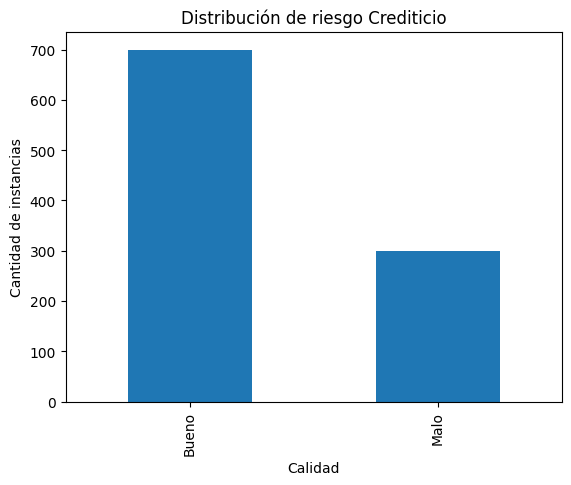

riesgo_crediticio
Bueno    700
Malo     300
Name: count, dtype: int64


In [181]:
target = df["riesgo_crediticio"]
target = df["riesgo_crediticio"].map({1: "Bueno", 2: "Malo"})

target.value_counts().plot(kind="bar")
plt.xlabel("Calidad")
plt.ylabel("Cantidad de instancias")
plt.title("Distribución de riesgo Crediticio")
plt.show()

print(target.value_counts())


# Procedemos a analizar las columnas referidas al cliente y sus caracteristicas. 

El objetivos es poder realizar la limpieza que sea necesaria, comprender un poco mas la distribucion y analizar posibles sesos. Creemos que esta manera va a permitirnos comprender mejor los datos con los que estamos trabajando.  

In [182]:
columnas_categoricas = ['años_empleo', 'estado_civil_sexo',  'vivienda', 'propiedad',  'ocupacion', 'telefono', 'trabajador_extranjero']
columnas_numericas = ['residencia_actual_anios', 'edad', 'num_personas_a_cargo']

Comenzando por las categoricas

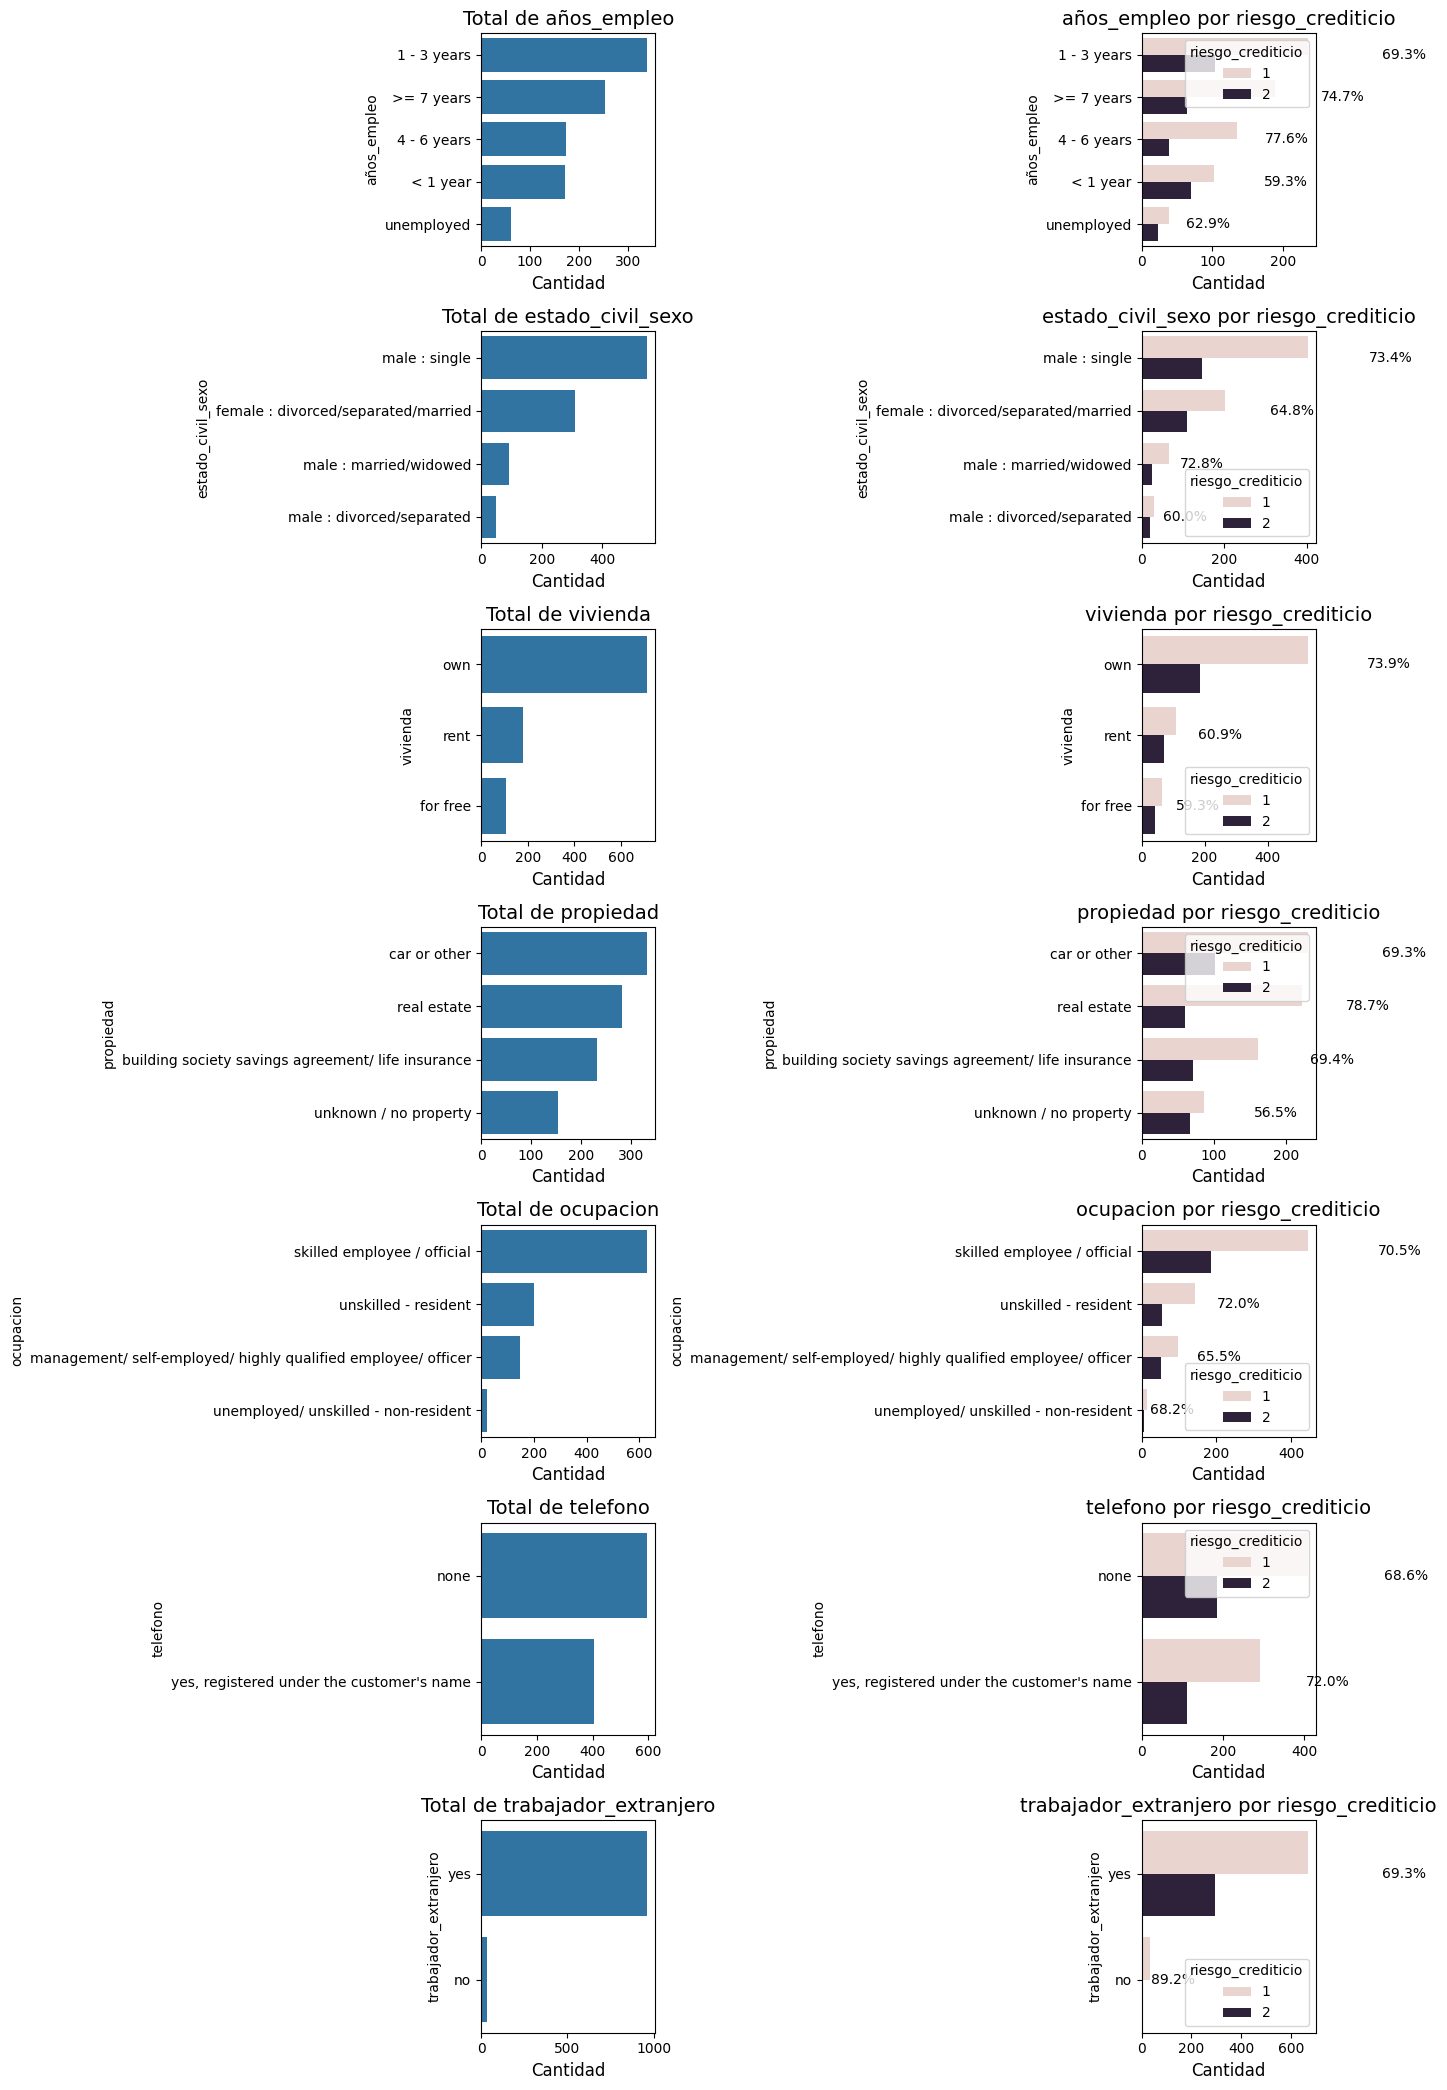

In [183]:
n_cols = 2  
n_rows = len(columnas_categoricas)

plt.figure(figsize=(8 * n_cols, 3 * n_rows))

for i, col in enumerate(columnas_categoricas):
    # Gráfico 1: Total por categoría
    plt.subplot(n_rows, n_cols, i * n_cols + 1)

    order = df[col].value_counts().index
    ax1 = sns.countplot(y=col, data=df, order=order)

    etiquetas_codigos = [tick.get_text() for tick in ax1.get_yticklabels()]
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos

    posiciones_ticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax1.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax1.set_title(f'Total de {col}', fontsize=14)
    ax1.set_xlabel('Cantidad', fontsize=12)

    # Gráfico 2: Distribución por riesgo_crediticio con % de positivos
    plt.subplot(n_rows, n_cols, i * n_cols + 2)

    ax2 = sns.countplot(y=col, hue="riesgo_crediticio", data=df, order=order)
    
    posiciones_ticks = ax2.get_yticks()
    ax2.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax2.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax2.set_title(f'{col} por riesgo_crediticio', fontsize=14)
    ax2.set_xlabel('Cantidad', fontsize=12)
    ax2.legend(title='riesgo_crediticio')

    # Cálculo del % de positivos por categoría
    for j, categoria in enumerate(order):
        subset = df[df[col] == categoria]
        total = len(subset)
        positivos = len(subset[subset['riesgo_crediticio'] == 1])
        porcentaje = (positivos / total) * 100 if total > 0 else 0

        x_pos = subset[col].value_counts().max() + 1
        y_pos = j

        ax2.text(x_pos, y_pos, f"{porcentaje:.1f}%", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [184]:
print(df[df['ocupacion'] == "A172"]["trabajador_extranjero"].value_counts())

print(df[df['ocupacion'] == "A171"]["trabajador_extranjero"].value_counts())

trabajador_extranjero
A201    186
A202     14
Name: count, dtype: int64
trabajador_extranjero
A201    20
A202     2
Name: count, dtype: int64


In [185]:
# modificamos sexo / estado civil
map_sexo = {'A91': 'male', 'A92': 'female', 'A93': 'male', 'A94': 'male', 'A95': 'female'}

map_estado_civil = {'A91': 'not_single', 'A92': 'not_single', 'A93': 'single', 'A94': 'not_single', 'A95': 'single'}

df['estado_civil'] = df['estado_civil_sexo'].map(map_estado_civil)
df['sexo'] = df['estado_civil_sexo'].map(map_sexo)

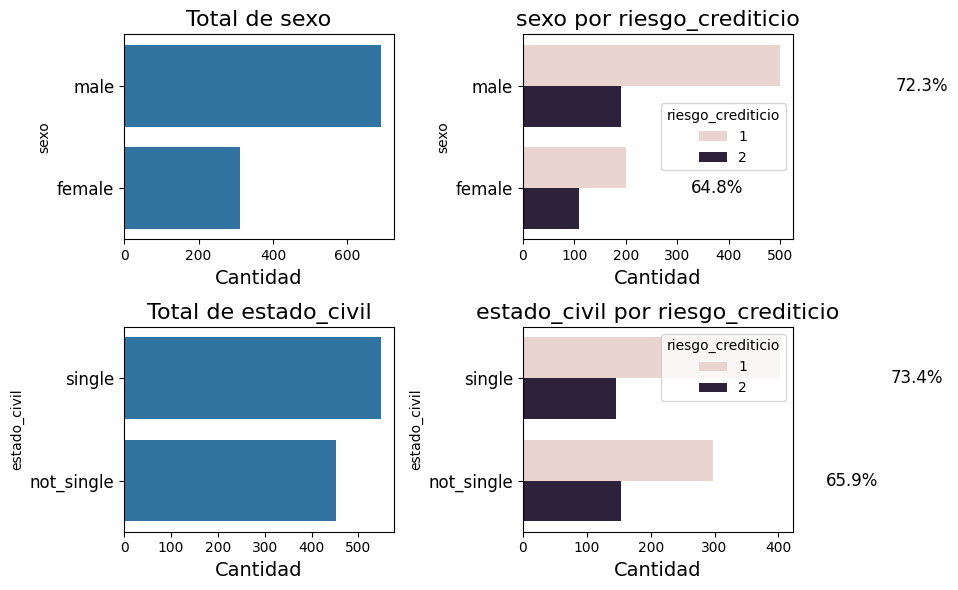

In [186]:
columnas_plot = ['sexo', 'estado_civil']
n_cols = 2  
n_rows = len(columnas_plot)

plt.figure(figsize=(5 * n_cols, 3 * n_rows))  

for i, col in enumerate(columnas_plot):
    # Gráfico 1: Total por categoría
    plt.subplot(n_rows, n_cols, i * n_cols + 1)

    order = df[col].value_counts().index
    ax1 = sns.countplot(y=col, data=df, order=order)

    etiquetas_codigos = [tick.get_text() for tick in ax1.get_yticklabels()]
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos

    posiciones_ticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax1.set_yticklabels(etiquetas_descriptivas, fontsize=12)

    ax1.set_title(f'Total de {col}', fontsize=16)
    ax1.set_xlabel('Cantidad', fontsize=14)

    # Gráfico 2: Distribución por riesgo_crediticio con % de positivos
    plt.subplot(n_rows, n_cols, i * n_cols + 2)

    ax2 = sns.countplot(y=col, hue="riesgo_crediticio", data=df, order=order)

    posiciones_ticks = ax2.get_yticks()
    ax2.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax2.set_yticklabels(etiquetas_descriptivas, fontsize=12)

    ax2.set_title(f'{col} por riesgo_crediticio', fontsize=16)
    ax2.set_xlabel('Cantidad', fontsize=14)
    ax2.legend(title='riesgo_crediticio')

    for j, categoria in enumerate(order):
        subset = df[df[col] == categoria]
        total = len(subset)
        positivos = len(subset[subset['riesgo_crediticio'] == 1])
        porcentaje = (positivos / total) * 100 if total > 0 else 0

        count_categoria = subset[col].value_counts().max()
        x_pos = count_categoria + count_categoria * 0.05  
        y_pos = j

        ax2.text(x_pos, y_pos, f"{porcentaje:.1f}%", va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

En primer lugar, en este caso analizamos si tratar o no, dos de las variables: 'estado_civil_sexo' y 'ocupacion'.

Para estado_civil_sexo, la columna presenta dos tipos de sesgo. En primer lugar tenemos posibles sesgos historicos relacionados con el género o el estado civil, que perpetuan direfencias en las oportunidades que tienen ciertos grupos sociales. Por otro lado, tambien hay un problema con la codificación de datos. Mas allá de que mezclar género y estado civil no es una buena practiva, porque un sesgo con una de ellas puede afectar en la otra, para el género femenino tenemos dos categorias de estado civil, soltera y casada/divorcida/separada, mientras que para hombre tenemos tres, soltero, casado/viudo y divorciado/separado. Las categorias género-estado_civil deberían tener todas las combinaciones.

Para el modelado, tomamos la decicion de separarla en dos columnas, sexo (sobre todo porque genero crearia un sesgo de cohorte, ya que estariamos usando categorias por defecto y quiza cambiando la identidad de alguna muestra) y estado civil. Esta ultima vamos a separarla en soltero / no soltero para que haya categorias comunes a ambos sexos, para que el atributo no sea un proxy de sexo. Somos concientes de que se puede llegar a estar introduciondo un sesgo de etiqueta por una interpretacion erronea del significado de las mismas, pero por nuestra investigacion previa creeriamos que esto no es el caso. Por otro lado, estamos introduciendo un sesgo de codificacion de datos al manipular las categorias, pero nos parece que vale la pena y es necesario para poder lograr que sean independientes.

Para ocupacion, vemos que unskilled esta separado por recidente y no residente. Idealmente, podriamos juntar estas variables en un mismo grupo, creando una variable separada para estado de residencia. El problema, es que para el resto de las categorias no tenemos esta informacion. Teniamos la teoria de que la residencia podia estar relacionada con la variable trabajador extrangero, y por ende esta informacion estaria en el modelo en otra columna y podriamos tranquilamente juntar los grupos con 'unskilled', pero esto no fue asi. Como sabemos que el estado de residencia puede ser una fuente de sesgo, ademas de que puede ser un proxy de extranjero, no queremos eliminar esta infromacion del modelo, ya que podriamos estar introduciendo un sesgo por codificacion de datos. Para evitar esto, decidimos dejarla tal cual, y existe la posibilidad de un analisis posterior de si efectivamente el estado de residencia esta sesgando el nivel de riesgo crediticio. 

Por otro lado, la columna trabajador_extranjero podria indicar que hay / puede existir un sesgo por discriminaciones sistematicas. El racismo / xenofobia podria verse integrado en las practicas sociales, llevando a que una persona estranjera no tenga la posibilidad de acceso a un préstamo. Tambien, por praticas historicas, su historial crediticio podria verse afectado.



In [187]:
df.drop('estado_civil_sexo', axis=1, inplace=True)

Ahora, pasamos a analizar las numericas

In [188]:
columnas_numericas = ['residencia_actual_anios', 'edad', 'num_personas_a_cargo']

C:\Users\CTI24644\AppData\Local\Temp\ipykernel_36720\2592645998.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='riesgo_crediticio')
C:\Users\CTI24644\AppData\Local\Temp\ipykernel_36720\2592645998.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='riesgo_crediticio')
C:\Users\CTI24644\AppData\Local\Temp\ipykernel_36720\2592645998.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='riesgo_crediticio')


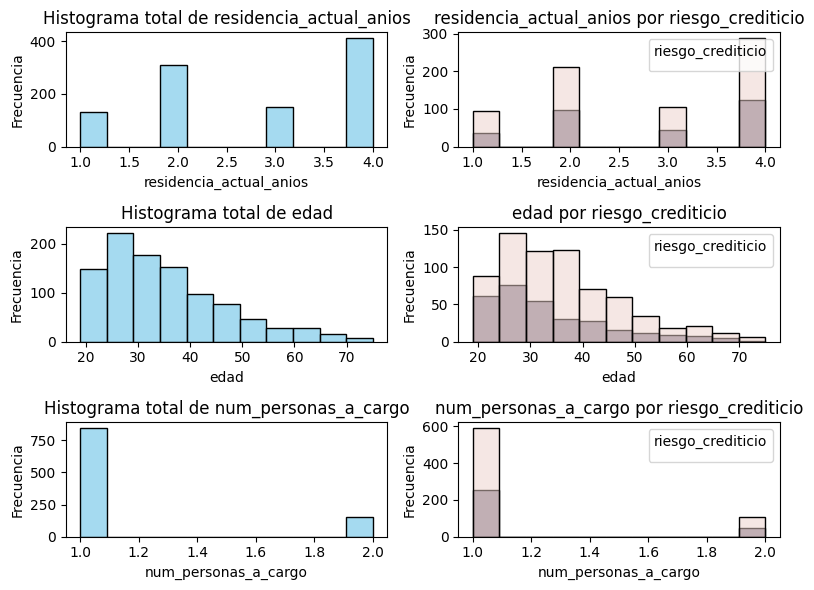

In [189]:
n_cols = 2  
n_rows = len(columnas_numericas)

plt.figure(figsize=(4 * n_cols, 2 * n_rows))

for i, col in enumerate(columnas_numericas):
    data = df[col]
    n = len(data)
    bins = int(np.ceil(np.log2(n) + 1))  

    # Histograma total
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(data, bins=bins, kde=False, color='skyblue')
    plt.title(f'Histograma total de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Histograma por riesgo_crediticio
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.histplot(data=df, x=col, hue='riesgo_crediticio', bins=bins, kde=False)
    plt.title(f'{col} por riesgo_crediticio')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='riesgo_crediticio')

plt.tight_layout()
plt.show()

In [190]:
print(df['num_personas_a_cargo'].value_counts())

num_personas_a_cargo
1    845
2    155
Name: count, dtype: int64


En esta parte encontramos dos posibles tipos de sesgo:

* propiedad / vivienda / num_personas_a_cargo / años_empleo: Proxy de clase social. Estas variables podrian llevar a que el modelo infiera informacion sobre la situacion socioeconomica de la persona, que puede llevar perpetuar el sesgo historico hacia la clase alta. Si bien tiene sentido que sea parte del analisis, es bueno analizar si el modelo no genera daños de asignacion, quitando oportunidades a personas en base a su condicion socio-economica.

* Edad: El modelo podria estar generando diferencias a partir de la edad de una persona. Si bien una mayor edad podria darle características deseables como historia crediticia y altos cargos o propiedades, existen casos donde se niegan préstamos a personas en base a su edad. 

INFO: Se nos habia ocurrido que quiza podiamos separar a las edades en distintas categorias, pero luego nos parecio que estariamos introduciondo un sesgo innecesario, ademas de que los modelos de clasificacion trabajan mejor con variables numericas, por lo qeu al hacerla categoria nos estabamos perjudicando sin razon.

### Procedemos a analizar los atributos relacionados al historial crediticio

El objetivo es cerciorarse, o al menos no encontrar de manera burda, algo que indique que estas columnas son muy dispares para un atributo sensible, como sexo

Analisis de columnas categoricas

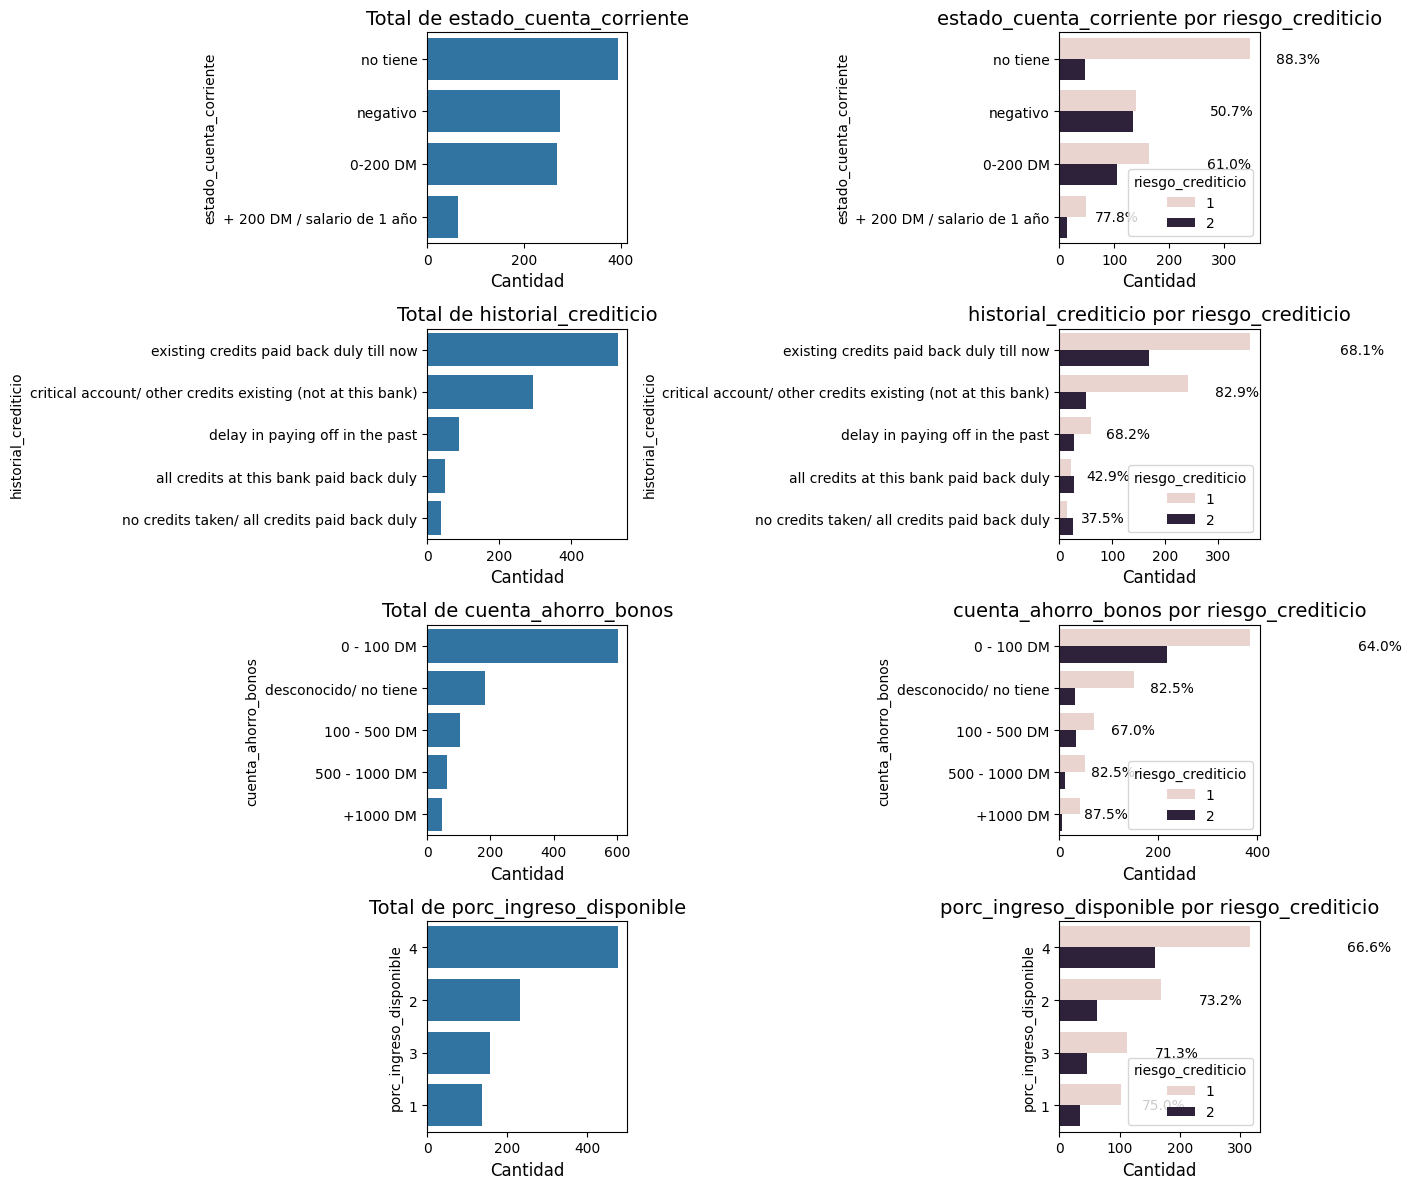

In [191]:
columnas_categoricas = ['estado_cuenta_corriente', 'historial_crediticio', 'cuenta_ahorro_bonos', 'porc_ingreso_disponible']

n_cols = 2  
n_rows = len(columnas_categoricas)

plt.figure(figsize=(8 * n_cols, 3 * n_rows))

for i, col in enumerate(columnas_categoricas):
    # Gráfico 1: Total por categoría
    plt.subplot(n_rows, n_cols, i * n_cols + 1)

    order = df[col].value_counts().index
    ax1 = sns.countplot(y=col, data=df, order=order)

    etiquetas_codigos = [tick.get_text() for tick in ax1.get_yticklabels()]
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos

    posiciones_ticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax1.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax1.set_title(f'Total de {col}', fontsize=14)
    ax1.set_xlabel('Cantidad', fontsize=12)

    # Gráfico 2: Distribución por riesgo_crediticio con % de positivos
    plt.subplot(n_rows, n_cols, i * n_cols + 2)

    ax2 = sns.countplot(y=col, hue="riesgo_crediticio", data=df, order=order)
    
    posiciones_ticks = ax2.get_yticks()
    ax2.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax2.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax2.set_title(f'{col} por riesgo_crediticio', fontsize=14)
    ax2.set_xlabel('Cantidad', fontsize=12)
    ax2.legend(title='riesgo_crediticio')

    # Cálculo del % de positivos por categoría
    for j, categoria in enumerate(order):
        subset = df[df[col] == categoria]
        total = len(subset)
        positivos = len(subset[subset['riesgo_crediticio'] == 1])
        porcentaje = (positivos / total) * 100 if total > 0 else 0

        x_pos = subset[col].value_counts().max() + 1
        y_pos = j

        ax2.text(x_pos, y_pos, f"{porcentaje:.1f}%", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Lo que podemos ver a primera vista, es que no pareciera que hubiera una relacion total entre estas variables y el riesgo crediticio. Nos referimos a una relacion total, como que cuanto mas tiene en la cuanta de ahorros, mas probabñe deberia ser que le den un credito, pero, si bien en algunas categorias es asi, hay mas % de instancias positivas entre los que no tienen cuantas de ahorro, que entre los que tienen poco dinero en la misma. No somos un banco, y por ende no podemos saber cual de los dos casos es mas riesgoso y cual es la justificacion, pero notamos que es algo que suucede en las otras cateorias tambien.

Por ende, veamos tambien como se ve esto si lo separamos por sexo, el atributo sensible por excelencia.

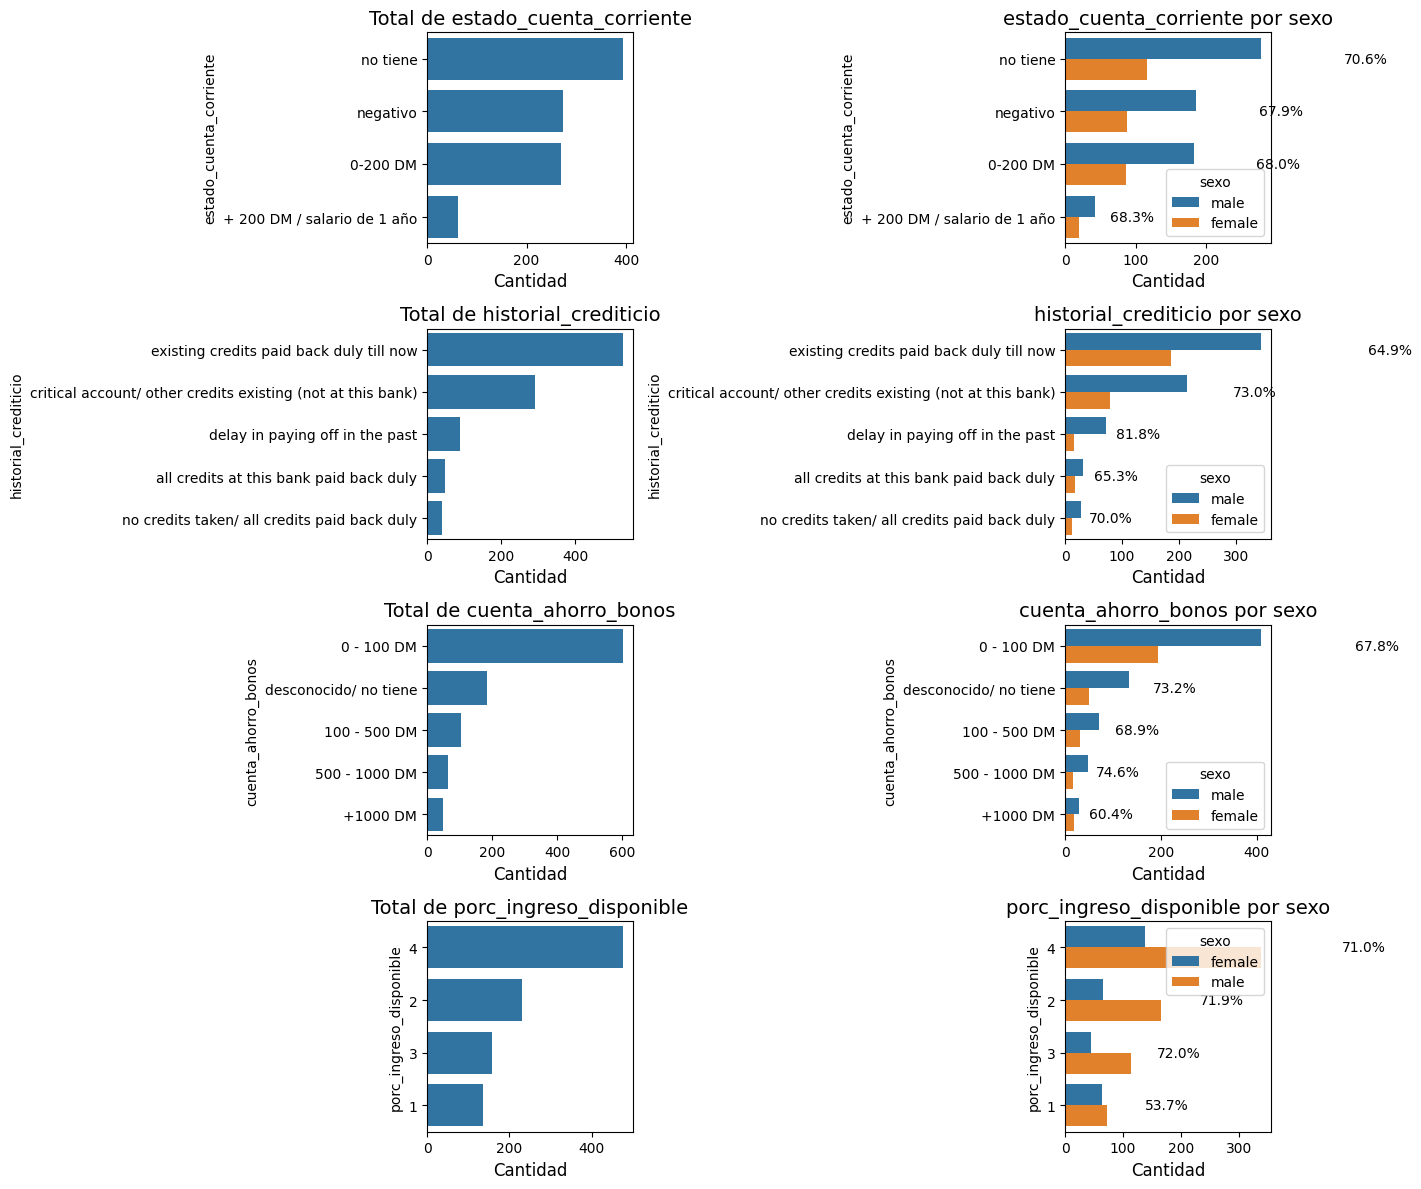

In [192]:
plt.figure(figsize=(8 * n_cols, 3 * n_rows))

for i, col in enumerate(columnas_categoricas):
    # Gráfico 1: Total por categoría
    plt.subplot(n_rows, n_cols, i * n_cols + 1)

    order = df[col].value_counts().index
    ax1 = sns.countplot(y=col, data=df, order=order)

    etiquetas_codigos = [tick.get_text() for tick in ax1.get_yticklabels()]
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos

    posiciones_ticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax1.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax1.set_title(f'Total de {col}', fontsize=14)
    ax1.set_xlabel('Cantidad', fontsize=12)

    # Gráfico 2: Distribución por riesgo_crediticio con % de positivos
    plt.subplot(n_rows, n_cols, i * n_cols + 2)

    ax2 = sns.countplot(y=col, hue="sexo", data=df, order=order)
    
    posiciones_ticks = ax2.get_yticks()
    ax2.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax2.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax2.set_title(f'{col} por sexo', fontsize=14)
    ax2.set_xlabel('Cantidad', fontsize=12)
    ax2.legend(title='sexo')

    # Cálculo del % de positivos por categoría
    for j, categoria in enumerate(order):
        subset = df[df[col] == categoria]
        total = len(subset)
        positivos = len(subset[subset['sexo'] == 'male'])
        porcentaje = (positivos / total) * 100 if total > 0 else 0

        x_pos = subset[col].value_counts().max() + 1
        y_pos = j

        ax2.text(x_pos, y_pos, f"{porcentaje:.1f}%", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

No hay una relacion directa que se pueda observar a simple vista, pero la diferencia de instancias de cada sexo en las distintas categorias es muy amplia, pero tambien la mayoria de las instancias son masculinas. Es simplemente algo a notar

C:\Users\CTI24644\AppData\Local\Temp\ipykernel_36720\932488835.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='riesgo_crediticio')


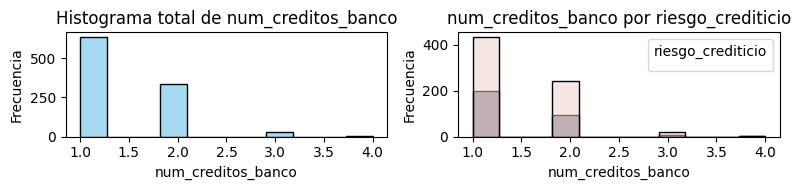

In [193]:
columnas_numericas = ['num_creditos_banco']
n_cols = 2  
n_rows = len(columnas_numericas)

plt.figure(figsize=(4 * n_cols, 2 * n_rows))

for i, col in enumerate(columnas_numericas):
    data = df[col]
    n = len(data)
    bins = int(np.ceil(np.log2(n) + 1))  

    # Histograma total
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(data, bins=bins, kde=False, color='skyblue')
    plt.title(f'Histograma total de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Histograma por riesgo_crediticio
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.histplot(data=df, x=col, hue='riesgo_crediticio', bins=bins, kde=False)
    plt.title(f'{col} por riesgo_crediticio')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='riesgo_crediticio')

plt.tight_layout()
plt.show()

C:\Users\CTI24644\AppData\Local\Temp\ipykernel_36720\3368355428.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='sexo')


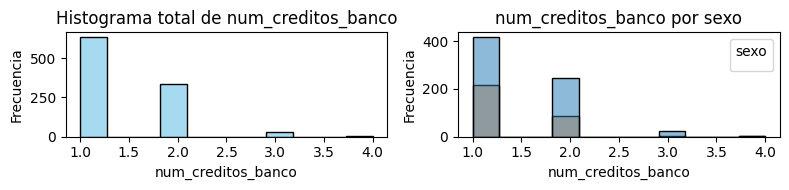

In [194]:
plt.figure(figsize=(4 * n_cols, 2 * n_rows))

for i, col in enumerate(columnas_numericas):
    data = df[col]
    n = len(data)
    bins = int(np.ceil(np.log2(n) + 1))  

    # Histograma total
    plt.subplot(n_rows, n_cols, i * 2 + 1)
    sns.histplot(data, bins=bins, kde=False, color='skyblue')
    plt.title(f'Histograma total de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Histograma por riesgo_crediticio
    plt.subplot(n_rows, n_cols, i * 2 + 2)
    sns.histplot(data=df, x=col, hue='sexo', bins=bins, kde=False)
    plt.title(f'{col} por sexo')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='sexo')

plt.tight_layout()
plt.show()

En este grafico los garficos son mas parecidos, pero no es suficiente para probar una relacion. Habra que investigar si efectivamente hay un sesgo en el modelo a diseñar.

Mas alla de eso, podria haber un sesgo institucional o social por el que las mujeres no acceden o piden prestamos, lo que afecta su historia crediticia. Habria que ver como se mide este punto en el modelo con su historia completa.

Como conclusion de este apartado, historial_crediticio / num_creditos_banco / podrian estar integrando un sesgo institucional, ya que el atributo representa una interaccion previa con el sistema financiero. Si una persona nunca accedio a un credito, no puede tener un historial positivo, pero esta falta de acceso puede deberse a una discriminacion previa. Ademas, aunque tuviera un prestamo previo, su comportamiento ante el pago del mismo tambien puede estar sesgado, dependiendo si tuvo mejores condiciones a partir de algun sesgo, puede haberle resultado más facil o dificil cumplir lo acordado, por lo que puede haber un sesgo de decisiones historicas de las instituciones que afecta/ modifica su riesgo real. Esta es una conclusion mas teorica y de analisis del tipo de atributo, pero qeu tambien puede generar la disparidad en las muestras.

# Por ultimo, revisamos las columnas relacionadas al prestamo a solicitar. 
La idea seria entender o ver si hay algun tipo de prestamo mas relacionado a un buen credito o mal credio, o a alguina variable sensible

In [195]:
columnas = ['proposito', 'otros_deudores_garantes']

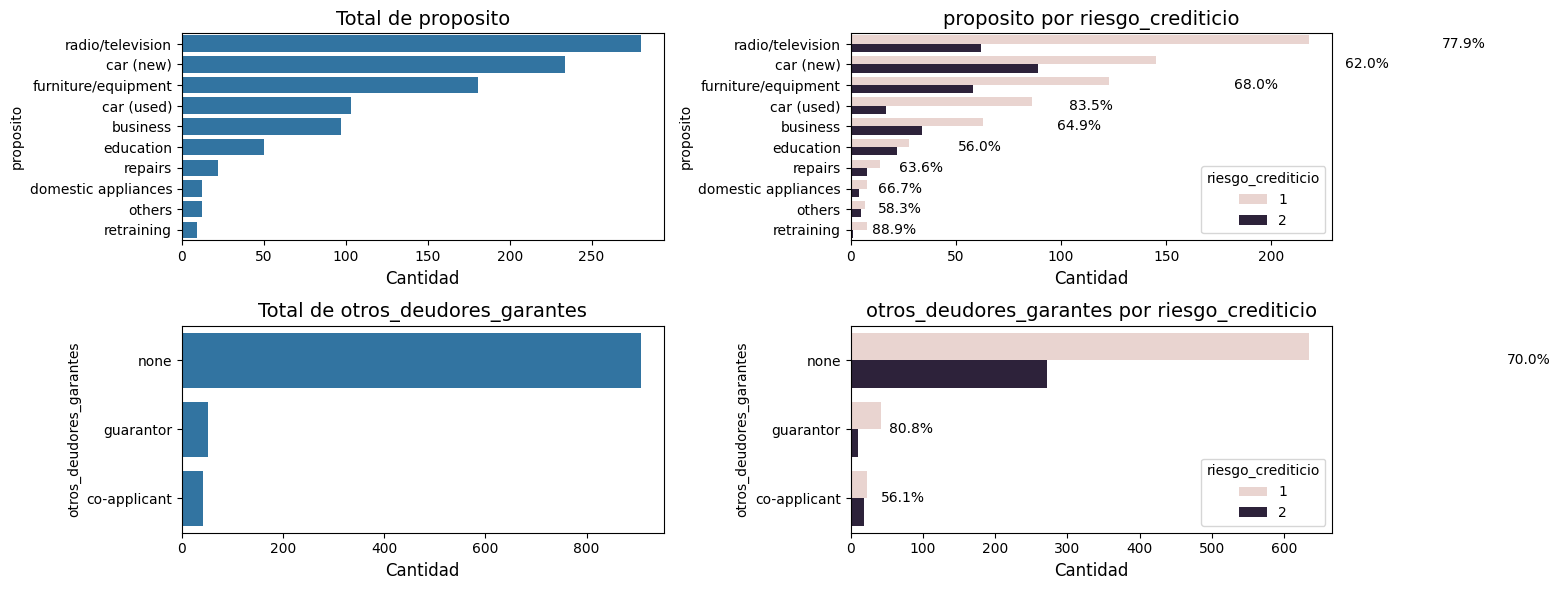

In [196]:
n_cols = 2  
n_rows = len(columnas)

plt.figure(figsize=(8 * n_cols, 3 * n_rows))

for i, col in enumerate(columnas):
    # Gráfico 1: Total por categoría
    plt.subplot(n_rows, n_cols, i * n_cols + 1)

    order = df[col].value_counts().index
    ax1 = sns.countplot(y=col, data=df, order=order)

    etiquetas_codigos = [tick.get_text() for tick in ax1.get_yticklabels()]
    if col in valores_unicos_significado:
        etiquetas_descriptivas = [valores_unicos_significado[col].get(codigo, codigo) for codigo in etiquetas_codigos]
    else:
        etiquetas_descriptivas = etiquetas_codigos

    posiciones_ticks = ax1.get_yticks()
    ax1.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax1.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax1.set_title(f'Total de {col}', fontsize=14)
    ax1.set_xlabel('Cantidad', fontsize=12)

    # Gráfico 2: Distribución por riesgo_crediticio con % de positivos
    plt.subplot(n_rows, n_cols, i * n_cols + 2)

    ax2 = sns.countplot(y=col, hue="riesgo_crediticio", data=df, order=order)
    
    posiciones_ticks = ax2.get_yticks()
    ax2.yaxis.set_major_locator(ticker.FixedLocator(posiciones_ticks))
    ax2.set_yticklabels(etiquetas_descriptivas, fontsize=10)

    ax2.set_title(f'{col} por riesgo_crediticio', fontsize=14)
    ax2.set_xlabel('Cantidad', fontsize=12)
    ax2.legend(title='riesgo_crediticio')

    # Cálculo del % de positivos por categoría
    for j, categoria in enumerate(order):
        subset = df[df[col] == categoria]
        total = len(subset)
        positivos = len(subset[subset['riesgo_crediticio'] == 1])
        porcentaje = (positivos / total) * 100 if total > 0 else 0

        x_pos = subset[col].value_counts().max() + 1
        y_pos = j

        ax2.text(x_pos, y_pos, f"{porcentaje:.1f}%", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [197]:
columnas = ['duracion_meses', 'monto_credito']

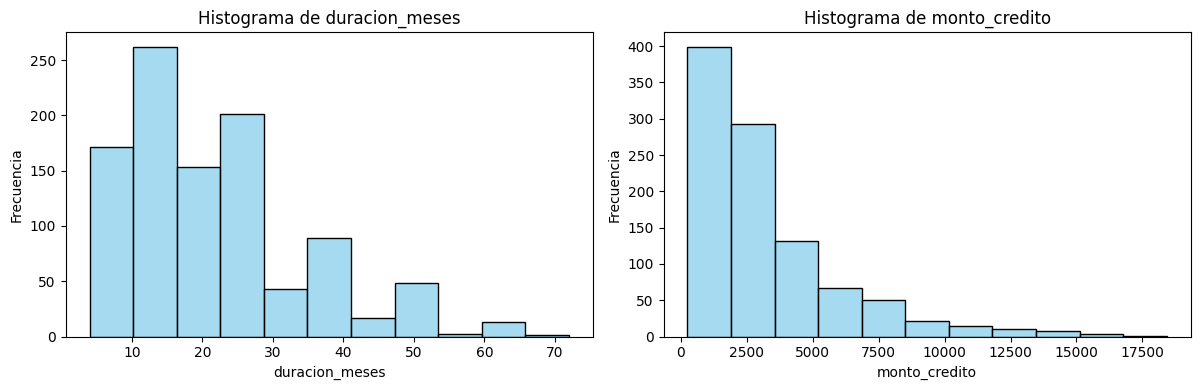

In [198]:
n_cols = 7
n_rows = (len(columnas) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(columnas, 1):
    data = df[col]
    data_min, data_max = data.min(), data.max()
    n = len(data)
    bins = int(np.ceil(np.log2(n) + 1))
    
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data, bins=bins, kde=False, color='skyblue', binrange=(data_min, data_max))
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Si bien hay diferencias entre los tipos de credito, el credito que solicitan deberia influir un modelo que predice el riesgo crediticio. Si el banco historicamente apreuba mas de un tipo de credito que otro, esto podria afectar. Por eso tomamos la decision de sacar estas columnas del dataset, porque las consideramos leaks.

Nuevamente, estamos incorporando un sesgo de codificacion de datos.

In [199]:
df = df.drop(columns=['proposito', 'otros_deudores_garantes', 'duracion_meses', 'monto_credito'])

# Mas allá de las columnas, hay otros tipos de sesgos que pueden estar involucrados:

* Sesgo de representación: El conjunto representa una muestra poblacional de personas que solicitaron un credito en una institucion particular. Por ende, la poblacion objetivo puede no estar debidamente representada, impidiendo que el modelo pueda generalizar. La diferencia en la cantidad de instancias entre hombres y mujeres sugiere que los datos no son representativos de la población general. Al encontrarnos con menos instancias de mujeres, es probable que un modelo entrenado con estos datos presente un comportamiento injusto para las mujeres.

* Sesgo cronologico: Los datos son de 1994, por ende, no necesariamente se adecuan a las caracteristicas poblacionales y a los criterios actuales de quien es o no un buen acreedor.

* Sesgo de selección: Es posible que el momento histórico y el contexto donde se generaron los datos, haga que cierto conjunto de atributos este más presente que otro, interfiriendo en los resultados. 

* Sego de confusión: En el dataset hay varios grupos de variables que podrian considerarse proxies de atributos sensibles, por lo que no solo hay relaciones directas, sino que estamos usando varias variables proxie que aluden al mismo atributo. Como hay mucha influencia, pueden distorcionarse los resultados.

* Sesgo poblacional: Los datos del modelo no necesariamente representan la poblacion objetiva, por ende,si bien el modelo puede tener buenos resultados en el entrenamiento y el testing, no necesariamente va a modelar correctamente la poblacion. 

El tamaño de la muestra también es algo a considerar, ya que más allá de las distribuciones desiguales de la cantidad de instancias por grupos de edades y por género, hay pocos datos.

# COMENZAMOS CON EL ARMADO DEL MODELO

In [200]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, make_scorer
from sklearn.calibration import cross_val_predict

En primer lugar, vamos a transformar el dataset utilizando one-hot encoding para que el clasificador pueda procesarlo correctamente. En un principio, consideramos interpretar algunas variables como ordinales para reducir la cantidad de columnas generadas, pero finalmente decidimos no hacerlo.

Aunque muchas categorías tienen un orden lógico y sus descripciones reflejan los límites entre ellas, el clasificador tiende a interpretar estas categorías ordinales como si unas fueran mejores que otras. 

Queríamos evitar introducir un sesgo de etiqueta artificial en el modelo, por lo que preferimos tratarlas como variables categóricas sin orden implícito. De esta manera, no se asume que una categoría es superior o inferior a otra.

In [201]:
features_encoded = pd.get_dummies(df, dtype=int)

Guardo la info separada por sexo, para despues poder analizar si esta sesgado por ese atributo

In [202]:
print(features_encoded['sexo_female'].value_counts())
print(features_encoded['sexo_male'].value_counts())

data_fem = features_encoded[features_encoded['sexo_female'] == 1]
data_male = features_encoded[features_encoded['sexo_male'] == 1]

sexo_female
0    690
1    310
Name: count, dtype: int64
sexo_male
1    690
0    310
Name: count, dtype: int64


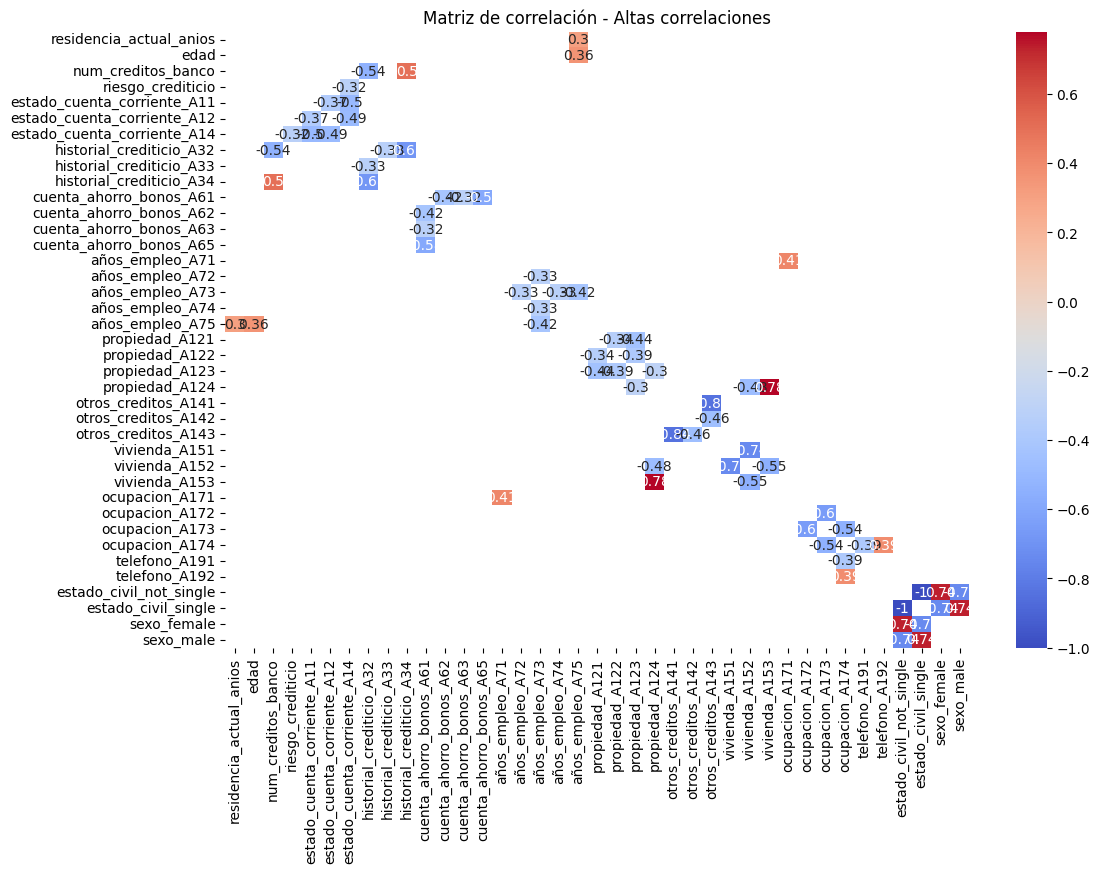

In [203]:
#Armamos una matriz de correlacion (su version legible), para ir teniendo idea de que atributos estan relacionados
corr = features_encoded.corr()
umbral = 0.3
high_corr_cols = corr[(corr.abs() > umbral) & (corr.abs() < 1)].dropna(how="all", axis=1).dropna(how="all", axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(high_corr_cols, annot=True, cmap='coolwarm')

plt.title('Matriz de correlación - Altas correlaciones')
plt.show()


In [204]:
Y = features_encoded['riesgo_crediticio']
Y = Y.replace(2,0)
Y = Y.replace(1,1)
X = features_encoded.drop(columns=['riesgo_crediticio'])


Siendo que planeamos usar validacion cruzada para tener una mejor idea del valor real de las metricas, creamos nuestras propias funciones de scoring, con las metricas relevantes para los criterios de fairnes.

Documentacion: https://scikit-learn.org/stable/modules/cross_validation.html

In [205]:
def tpr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if (tp + fn) else 0

def tnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) else 0

def ppv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fp) if (tp + fp) else 0

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'tpr': make_scorer(tpr_score),
    'tnr': make_scorer(tnr_score),
    'ppv': make_scorer(ppv_score)
}

In [206]:
clf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

y_pred = cross_val_predict(clf, X, Y, cv=cv)
cm = confusion_matrix(Y, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("----- Matriz de Confusión -----", end='\n\n')

print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {TP:^15} | {FN:^15} |')
print(f'{"Real Negativa":^15} | {FP:^15} | {TN:^15} |')

results = cross_validate(clf, X, Y, cv=cv, scoring=scoring)
 
print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f"Precisión: {round(results['test_precision'].mean(), 2)} - {round(results['test_precision'].std(), 2)}")
print(f"Recall: {round(results['test_recall'].mean(),2)} - {round(results['test_recall'].std(), 2)}")
print(f"F1-score: {round(results['test_f1'].mean(),2)} - {round(results['test_f1'].std(), 2)}")
print(f"True positive rate (TPR): {round(results['test_tpr'].mean(),2)} - {round(results['test_tpr'].std(), 2)}")
print(f"True negative rate (TNR): {round(results['test_tnr'].mean(),2)} -  {round(results['test_tnr'].std(), 2)}")
print(f"Positive predictive value (PPV): {round(results['test_ppv'].mean(),2)} - {round(results['test_ppv'].std(), 2)}")

----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       632       |       68        |
 Real Negativa  |       186       |       114       |

----- Métricas de Evaluación -----

Precisión: 0.77 - 0.01
Recall: 0.9 - 0.02
F1-score: 0.83 - 0.02
True positive rate (TPR): 0.9 - 0.02
True negative rate (TNR): 0.39 -  0.05
Positive predictive value (PPV): 0.77 - 0.01


Armamos un segundo modelo, que sea regresor logistico, para analizar cual nos da mejores metricas de entrada y ahi analizar con cual nos quedamos como modelo final para analizar la equidad

In [207]:
log_clf = LogisticRegression(random_state=33)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

y_pred = cross_val_predict(log_clf, X, Y, cv=cv)
cm = confusion_matrix(Y, y_pred)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("----- Matriz de Confusión -----", end='\n\n')

print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {TP:^15} | {FN:^15} |')
print(f'{"Real Negativa":^15} | {FP:^15} | {TN:^15} |')

results = cross_validate(log_clf, X, Y, cv=cv, scoring=scoring)
 
print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f"Precisión: {round(results['test_precision'].mean(), 2)} - {round(results['test_precision'].std(), 2)}")
print(f"Recall: {round(results['test_recall'].mean(),2)} - {round(results['test_recall'].std(), 2)}")
print(f"F1-score: {round(results['test_f1'].mean(),2)} - {round(results['test_f1'].std(), 2)}")
print(f"True positive rate (TPR): {round(results['test_tpr'].mean(),2)} - {round(results['test_tpr'].std(), 2)}")
print(f"True negative rate (TNR): {round(results['test_tnr'].mean(),2)} -  {round(results['test_tnr'].std(), 2)}")
print(f"Positive predictive value (PPV): {round(results['test_ppv'].mean(),2)} - {round(results['test_ppv'].std(), 2)}")

C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       618       |       82        |
 Real Negativa  |       171       |       129       |


C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or


----- Métricas de Evaluación -----

Precisión: 0.78 - 0.02
Recall: 0.88 - 0.04
F1-score: 0.83 - 0.02
True positive rate (TPR): 0.88 - 0.04
True negative rate (TNR): 0.43 -  0.07
Positive predictive value (PPV): 0.78 - 0.02


C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Para elegir que modelo usamos, pensamos cuales metricas se adaptan mejor a la casuistica aprticular

Si el banco que otorga los créditos tiene el objetivo institucional de **maximizar la cantidad que efectivamente pagarán el préstamo**, el **error más perjudicial sería el falso positivo** (clasificar como buen riesgo crediticio a alguien que no pagaría). Esto seria ya que dar dinero que no vuelve, representa una **pérdida económica directa** para la institución.

Aunque los falsos negativos pueden implicar perder posibles buenos clientes, los falsos positivos suponen un **riesgo financiero más importante**. Si comparamos la **potendial** ganancia ante una perdida **real**, creemos que una perdida directa es mas grave.

# Para nuestra casuistica particular

Consideramos que si lo mas importante es controlas los FP, entonces una metrica muy importante para el modelo es el PPV, ya un valor cercano a 1 indica que de las predicciones positivas, la mayoria son correctas. En este caso, el valor para ambos modelos es muy similar. Como esto sucede en la mayoria de las metricas, la decision se basa en la mas distinta, el TNR. Esta metrica indica de las muestras negativas, que proporcion se predice correctamente, y como es mas alta en el modelo del regresor lineal, ese es el que vamos a usar.

ACLARACION: Somos concientes de que quiza no es el mejor modelo, sobre todo porque la prediccion sobre la clase negativa no es buena, pero reconocemos que no es el objetivo del trabajo. Queremos quedarnos con el modelo, y poder ver que **si es malo, que sea igual de malo para todos**.

In [208]:
# dejamos el modelo entrenado 

X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.2, random_state=13)
log_clf.fit(X_test, y_test)

C:\Users\CTI24644\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=33)

## Interpretacion de los criterios Fairness

En el contexto de la asignación de prestamos, después de ver los datos, consideramos como grupos de interés para buscar la equidad a las mujeres y los hombres, aunque también se podría considerar un grupo cada franja de edades. Siendo esos los grupos que nos interesan, en este contexto interpretamos los criterios de fairness de la siguiente manera: 

- *Statistical Parity*:
Este criterio se cumple si para todos los grupos la taza de predicciones positivas es la misma. En este contexto, eso significa que tanto para hombres como para mujeres se debería tener la misma probabilidad de conseguir que el modelo los clasifique como un buen credito y en consecuencia el banco les de un credito.

- *Equalized Odds*:
En el caso de este criterio se busca que la probabilidad de que se apruebe el credito dado que era un buen credito y la probabilidad de que se apruebe el credito siendo que en la realidad era un mal credito sean las mismas entre los grupos. Esto se traduce en que se busca que para hombres y mujeres exista  la misma probabilidad de conseguir un prestamo dado que realmente es un buen credito, y la misma probabilidad de obtenerlo dado que no es un buen credito. Se espera que para las asignaciones de prestamos el modelo acierte y se equivoque con la misma taza entre grupos.

- *Equal Opportunity*:
Para este contexto implica que para hombres y mujeres exista la misma probabilidad de conseguir un préstamo dado que realmente es un buen credito. Solo mira los True Positive Rate. 

- *Predictive Parity*:
Este criterio se cumple cuando entre los grupos de interés la probabilidad de que en la realidad sea positivo dado que la predicción es positiva es la misma o similar. En el contexto de los prestamos se traduce buscando que si el modelo aprueba un credito, la probabilidad de que realmente sea un buen credito sea la misma tanto para mujeres como para hombres, es decir que la taza de prestamos aprobados correctamente sea similar.

# Analisis para los distintos grupos

In [ ]:
# SEXO FEMEMINO
Y = data_fem['riesgo_crediticio']
Y = Y.replace(2,0)
y_fem = Y.replace(1,1)
X_FEM = data_fem.drop(columns=['riesgo_crediticio'])

y_fem_pred = log_clf.predict(X_FEM)

cm = confusion_matrix(y_fem, y_fem_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("----- Matriz de Confusión -----", end='\n\n')
print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {TP:^15} | {FN:^15} |')
print(f'{"Real Negativa":^15} | {FP:^15} | {TN:^15} |')


tpr_fem = TP / (TP + FN) if (TP + FN) else 0
fpr_fem = FP / (FP + TN) if (FP + TN) else 0
ppv_fem = TP / (TP + FP) if (TP + FP) else 0
tasa_Y1_fem = (TP + FN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) else 0

print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f'% muestras positivas: {round(tasa_Y1_fem, 2)}')
print(f'tpr: {round(tpr_fem,2)}')
print(f"fpr: {round(fpr_fem, 2)}")
print(f"PPV: {round(ppv_fem,2)}")

----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       160       |       41        |
 Real Negativa  |       49        |       60        |

----- Métricas de Evaluación -----

% muestras positivas: 0.65
tpr: 0.8
fpr: 0.45
PPV: 0.77


In [215]:
# SEXO MASCULINO
Y = data_male['riesgo_crediticio']
Y = Y.replace(2,0)
y_masc = Y.replace(1,1)
X_MASC = data_male.drop(columns=['riesgo_crediticio'])

y_masc_pred = log_clf.predict(X_MASC)

cm = confusion_matrix(y_masc, y_masc_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("----- Matriz de Confusión -----", end='\n\n')
print(f'                | {"Pred. Positiva":^15} | {"Pred. Negativa":^15} |')
print(f'{"Real Positiva":^15} | {TP:^15} | {FN:^15} |')
print(f'{"Real Negativa":^15} | {FP:^15} | {TN:^15} |')

tpr_masc = TP / (TP + FN) if (TP + FN) else 0
fpr_masc = FP / (FP + TN) if (FP + TN) else 0
ppv_masc = TP / (TP + FP) if (TP + FP) else 0
tasa_Y1_masc = (TP + FN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) else 0

print("\n----- Métricas de Evaluación -----", end='\n\n')
print(f'% muestras positivas: {round(tasa_Y1_masc, 2)}')
print(f'tpr: {round(tpr_masc,2)}')
print(f"fpr: {round(fpr_masc, 2)}")
print(f"PPV: {round(ppv_masc,2)}")



----- Matriz de Confusión -----

                | Pred. Positiva  | Pred. Negativa  |
 Real Positiva  |       461       |       38        |
 Real Negativa  |       127       |       64        |

----- Métricas de Evaluación -----

% muestras positivas: 0.72
tpr: 0.92
fpr: 0.66
PPV: 0.78


Entonces, ahora que ya tenemos las metricas, analizamos todos los criterios de fairness

Vamos a usar el criterio de que el modulo de la diferencia debe ser menos a 0.15

Porque ese valor?? Porque era el valor que se uso en el parcial y por ende, asumimos que es uno razonable. 

In [224]:
# statistical parity
mod_diff = abs(tasa_Y1_fem - tasa_Y1_masc)
print("\n----- Statistical Parity -----")
print(f"fem:{tasa_Y1_fem} - masc:{tasa_Y1_masc}")
print(f"Absolute difference in positive rates: {round(mod_diff, 2)}")
print(f'{'Se cumple' if mod_diff <= 0.15 else 'No se cumple'} el criterio de fairness', end='\n\n')


# equalized odds
mod_diff = abs(tpr_fem - tpr_masc)
print("\n----- Equalized Odds -----")
print(f"fem:{tpr_fem} - masc:{tpr_masc}")
print(f"Absolute difference in positive rates: {round(mod_diff, 2)}")
print(f'{'Se cumple' if mod_diff <= 0.15 else 'No se cumple'} el criterio de fairness', end='\n\n')

# equal opportunity
mod_diff2 = abs(fpr_fem - fpr_masc)
print("\n----- Equal Opportunity -----")
print(f"fem:{fpr_fem} - masc:{fpr_masc}")
print(f"Absolute difference in positive rates: {round(mod_diff, 2)}")
print(f"Absolute difference in false positive rates: {round(mod_diff2, 2)}")
print(f'{'Se cumple' if mod_diff <= 0.15 and mod_diff2 <= 0.15 else 'No se cumple'} el criterio de fairness', end='\n\n')

# predictive parity
mod_diff = abs(ppv_fem - ppv_masc)
print("\n----- Predictive Parity -----")
print(f"fem:{ppv_fem} - masc:{ppv_masc}")
print(f"Absolute difference in positive predictive values: {round(mod_diff, 2)}")
print(f'{'Se cumple' if mod_diff <= 0.15 else 'No se cumple'} el criterio de fairness', end='\n\n')


----- Statistical Parity -----
fem:0.6483870967741936 - masc:0.7231884057971014
Absolute difference in positive rates: 0.07
Se cumple el criterio de fairness


----- Equalized Odds -----
fem:0.7960199004975125 - masc:0.9238476953907816
Absolute difference in positive rates: 0.13
Se cumple el criterio de fairness


----- Equal Opportunity -----
fem:0.44954128440366975 - masc:0.6649214659685864
Absolute difference in positive rates: 0.13
Absolute difference in false positive rates: 0.22
No se cumple el criterio de fairness


----- Predictive Parity -----
fem:0.7655502392344498 - masc:0.7840136054421769
Absolute difference in positive predictive values: 0.02
Se cumple el criterio de fairness



Estas son noticias muy buenas para nuestra idea inicial de que como banco, queremos que sea importante el PPV, y en este caso, predictive parity, o sea, el criterio con el que se relaciona, es fair.

Por otro lado, siendo que nosotros notamos que nuetsro modelo erraba mucho con la clase negativa, y teniamos la esperanza de que fuera igual de malo para todos, podemos ver que no pareciera ser asi. La metrica relacionada con la clasificacion de la clase negativa es el FPR, que indica la proporcion de casos negativos que fueron clarificados de forma incorrecta. Siendo que es alto, buscabamos que fuera igual de alto para ambos grupos, pero vemos que no se da, ya que no se cumple equal opportunity. Por suerte, se cumple equalized odds, por ende, para la clase positiva, funciona lo suficientemente igual de bien para ambos!